# Euler-Lagrange: fuerzas externas | Ejemplos

[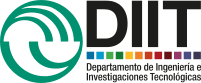](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Ejemplo: péndulo con fuerza elástica
La cuerda de un péndulo tiene cierta elastícidad, lo cual puede contemplarse al realizar un modelo para obtener su dinámica.

En la figura de abajo la pesa de masa $m$ cuyo centro se denomina $C$ no solo está a merced de la fuerza peso $\vec{P} = m \vec{g}$ y la elástica del resorte sino que además actúa una 
$$
\vec{F}= F(t) \hat{I}.
$$

![](figuras/penduloElastico.png "Péndulo con cuerda elástica")

### Cálculo del trabajo virtual
- Desplazamiento virtual en función de coordenadas generalizadas

$$
\delta \vec{r}_c
= \delta x \hat{\rho} + (l_0 + x) \delta \theta \hat{\theta}
= \delta x \left( \sin(\theta) \hat{I} - \cos(\theta) \hat{J} \right) + (l_0 + x) \delta \theta \left( \cos(\theta) \hat{I} + \sin(\theta) \hat{J} \right).
$$
- Trabajo virtual a causa de la $\vec{F}$ aplicada en $C$

$$
\begin{aligned}
\delta W
&= \sum_i Q_i \delta q_i = \vec{F} \cdot \delta \vec{r}_C = F(t) \hat{I} \cdot \delta \vec{r}_c\\
&= F(t) \sin(\theta) \delta x + F(t) (l_0 + x) \cos(\theta) \delta \theta \\
&= Q_x \delta x + Q_\theta \delta \theta \\
&\implies Q_x = F(t) \sin(\theta) \quad Q_\theta = F(t) (l_0 + x) \cos(\theta)
\end{aligned}
$$

### Cálculo directo de fuerzas generalizadas
- Se escribe $\vec{r}$ en el sistema geométrico de coordenadas 

$$
\vec{r}_C = (l_0 + x) \hat{\rho} = (l_0 + x) \left( \sin(\theta) \hat{I} - \cos(\theta) \hat{J} \right)
$$

- Se calcula para cada $\delta q_i$

$$
Q_i \delta q_i = \sum_j \vec{F} \cdot \left( \frac{\partial \vec{r}_j}{\partial q_i} \right) \delta q_i
$$

$\exists! \vec{F} \implies
Q_x \delta x = \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial x} \quad
Q_\theta = \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial \theta}$.

$$
Q_x 
= \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial x} 
= F(t) \hat{I} \cdot \left( \sin(\theta) \hat{I} - \cos(\theta) \hat{J} \right)
= F(t) \sin(\theta)
$$

$$
Q_\theta 
= \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial \theta} 
= F(t) \hat{I} \cdot (l_0 + x) \left( \cos(\theta) \hat{I} + \sin(\theta) \hat{J} \right)
= F(t) (l_0 + x) \cos(\theta)
$$

## Otro ejemplo: barra que pende de un carro
- Barra $m_2$, $l$ (centro de masa en G) pende de (A) sujeta a $\vec{g}$.
- Carro $m_1$ unido a pared por un resorte de constante elástica $k$.

![](figuras/erste.png "Barra rígida como péndulo pendiente de un carro oscilante")

### Lagrangiano

Recorando que la fuerza elástica que ejerce el resorte es $\vec{F}_\text{elástica}= - k x \hat{x}$ y que el momento de inercia de una barra calculado desde el extremo $I= \frac{m}{12} l^2$, se puede calcular el Lagrangiano

$$
\mathcal{L}( x, \dot{x}, \theta, \dot{\theta} ) = \frac{m_1}{2} \dot{x}^2 + \frac{m_2}{2} 
\left( 
\dot{x}^2 
+ l \dot{x} \dot{\theta} \cos(\theta)
+ \frac{l^2 \dot{\theta}^2 }{4}
\right) + \frac{1}{2} \left( \frac{m_2 }{3} l^2 \dot{\theta}^2 \right)
- \frac{k}{2} x^2
+ m_2 g \frac{l}{2} \cos(\theta).
$$

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
# import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Defino los parámetros físicos del sistema
m1, m2, k, g, l = sym.symbols('m_1, m_2, k, g, l', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
x = sym.Function('x')(t)
theta = sym.Function('theta')(t)

In [5]:
# posiciones de los centros de masa
N = mech.ReferenceFrame('N')
m1_r = x* N.x
m2_r = m1_r + (l/2)* (sym.sin(theta)* N.x + sym.cos(theta)* (-N.y) )

Para calcular la energía cinética de rotación
$$
T_\mathrm{rotación} = \frac{1}{2} I \omega^2,
$$
necesitamos el [momento de inercia](https://es.wikipedia.org/wiki/Anexo:Momentos_de_inercia) $I$.
Para una barra de longitud $l$ y masa $m$ girando en torno a un eje transversal al longitudinal que pasa por su centro de masa es
$$
I_\mathrm{barra\,cm} = \frac{m l^2}{12}.
$$
En este problema tal eje está desplazado a un extremo de la barra, a $\frac{l}{2}$ del centro de masa, por lo que debe adicionarse el término que indica el [teorema de Steiner](https://es.wikipedia.org/wiki/Teorema_del_eje_paralelo)
$$
I_\mathrm{barra\,extremo} = m \left(\frac{l}{2}\right)^2 + \frac{m l^2}{12} = m \frac{l^2}{3}.
$$


In [13]:
# Energía cinética
unMedio = sym.Rational(1,2)
m1_v = m1_r.diff(t,N)
m2_v = m2_r.diff(t,N)
I_barra_centro = m2* l**2/ 12  # momento de inercia barra en torno a centro https://es.wikipedia.org/wiki/Anexo:Momentos_de_inercia
I_barra_extremo = I_barra_centro + m2* (l/2)**2 # a (l/2) del centro de masa, con teorema de Steiner
T_rotación = unMedio* I_barra_extremo* theta.diff(t)**2
I_barra_extremo

In [14]:
T_traslación = unMedio* (m1* m1_v.dot(m1_v) + m2* m2_v.dot(m2_v) )
T = sym.Eq(sym.Symbol('T'), T_traslación + T_rotación )
T

In [18]:
# Energía potencial
V_gravitacional = -m2* (g* (-N.y)).dot(m2_r)
V_elástica = (k/2)* x**2
V = sym.Eq(sym.Symbol('V'), V_gravitacional + V_elástica )

In [21]:
# Lagrangiano
L = sym.Eq(sym.Symbol('\mathcal{L}'), T.rhs - V.rhs)
L

### Dos ecuaciones de Euler-Lagrange
$$
\frac{\partial \mathcal{L} }{ \partial x } - \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{x} } 
= 0
$$

In [31]:
x_dq = L.rhs.diff(x)
x_dtdp = L.rhs.diff(x.diff(t)).diff(t)
x_EL = sym.Eq(x_dq- x_dtdp).simplify().expand()
x_EL

$$
\frac{\partial \mathcal{L} }{ \partial \theta } - \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{\theta} } 
= 0
$$

In [29]:
theta_dq = L.rhs.diff(theta)
theta_dtdp = L.rhs.diff(theta.diff(t)).diff(t)
theta_EL = sym.Eq(theta_dq- theta_dtdp).simplify().expand()
theta_EL

### Ahora agregamos unas fuerzas no conservativas
Al sistema anterior se aplican dos fuerzas no conservativas:
- una motríz externa $\vec{F}_\text{motríz}= F(t) \hat{x}$
- una de amortiguación proporcional a la velocidad $\vec{F}_\text{amortiguación}= - b \dot{x} \hat{x}$

![](figuras/zweite.png "Lo mismo con una fuerza motríz y una de amortiguación.")

Se analizan la variación de trabajos virtuales

$$
\begin{aligned}
\delta W^\text{nc} 
& = \sum_j \vec{F}_j^\text{nc} \cdot \delta \vec{r}_j = \sum_i Q_i \delta q_i \\
& = \left[ - b \dot{x} + F(t) \right] \delta x + \left[ 0 \right] \delta \theta \\
& \implies Q_x = - b \dot{x} + F(t) \quad Q_\theta = 0
\end{aligned}
$$

La otra forma es analizando el desplazamiento de punto donde se aplica \\(\vec{F}(t)\\)
$$
\vec{r}_A = x \hat{X}
$$
entonces
$$
\frac{\partial \vec{r}_A}{\partial x} = \hat{X}\\
\frac{\partial \vec{r}_A}{\partial \theta} = 0 ,
$$
y por tanto
$$
Q_x 
= \left[ \left(- b \dot{x} + F(t) \right) \hat{x} \right] \cdot \frac{\partial \vec{r}_A}{\partial x} 
= \left[ \left(- b \dot{x} + F(t) \right) \hat{x} \right] \cdot \hat{x} 
= - b \dot{x} + F(t)\\
Q_\theta 
= \left[ \left(- b \dot{x} + F(t) \right) \hat{x} \right] \cdot \frac{\partial \vec{r}_A}{\partial \theta} = 0
$$
esta última es $0$ porque $\vec{r}_A$ no tiene dependencia con $\theta$.

Este último procedimiento parece el más automático.

In [38]:
b = sym.Symbol('b', positive= True)
F = sym.Function('F')(t)
fuerzas_m1_r = (-b* x.diff(t)+ F)* N.x # sumataria de fuerzas sobre m1_r (vector)
x_Q = fuerzas_m1_r.dot(m1_r.diff(x, N))
theta_Q = fuerzas_m1_r.dot(m1_r.diff(theta, N))
x_Q, theta_Q 

Entonces las ecuaciones de Euler-Lagrange
$$
\frac{\partial}{\partial q_i} \mathcal{L}
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
+ \sum_k \lambda_k \frac{\partial}{\partial q_i} f_k
+ \sum_j \vec{F}_j \cdot \left( \frac{\partial \vec{r}_j}{\partial q_i} \right)
= 0,
$$
que en este caso no tienen fuerzas de vínculo.

Para la coordenada generalizada $x$ queda
$$
\frac{\partial \mathcal{L} }{ \partial x } 
- \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{x} }
+ (-b \dot{x} \hat{x} ) \cdot \hat{x}
+ F(t) \hat{x}  \cdot \hat{x}
= 0
$$

In [39]:
x_EL = sym.Eq(x_dq- x_dtdp + x_Q).simplify().expand()
x_EL

En tanto que para la coordenada $\theta$ no hay modificaciones 

In [40]:
theta_EL = sym.Eq(theta_dq- theta_dtdp + theta_Q).simplify().expand()
theta_EL